In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118
!pip install diffusers transformers accelerate scipy safetensors
!pip install Pillow opencv-python
!pip install streamlit  # Only if you want a web UI later
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118


In [ ]:
from huggingface_hub import login

login("T_O_K_E_N")


In [ ]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "valhalla/emoji-diffusion",
    torch_dtype=torch.float16
).to("cuda")

euler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = euler

prompt = "a unicorn llama emoji"
image = pipe(prompt, num_inference_steps=30).images[0]
image.show()



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--valhalla--emoji-diffusion/snapshots/590d926ba61e02781bfd4935112015d4432f501d/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--valhalla--emoji-diffusion/snapshots/590d926ba61e02781bfd4935112015d4432f501d/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--valhalla--emoji-diffusion/snapshots/590d926ba61e02781bfd4935112015d4432f501d/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--valhalla--emoji-diffusion/snapshots/590d926ba61e02781bfd4935112015d4432f501d/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.St

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
prompt = "bit emote of 2 people wedding"
image = pipe(prompt).images[0]



  0%|          | 0/50 [00:00<?, ?it/s]

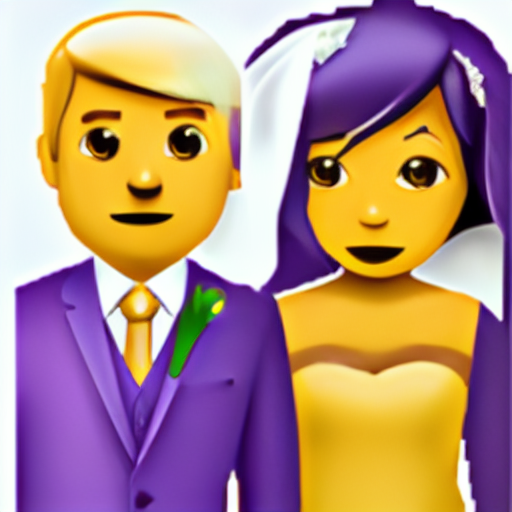

In [ ]:
from IPython.display import display
display(image)


In [ ]:
%%writefile app.py
import streamlit as st
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

st.title("Custom Image Generator with Stable Diffusion")

prompt = st.text_input("Enter your prompt:")

if "pipe" not in st.session_state:
    st.session_state.pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16
    )
    st.session_state.pipe = st.session_state.pipe.to("cuda")

if st.button("Generate Image"):
    image = st.session_state.pipe(prompt).images[0]
    st.image(image)


Overwriting app.py


In [ ]:
!ngrok config add-authtoken T_O_K_E_N


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:


from pyngrok import ngrok
import threading
import os

# Start ngrok tunnel

public_url = ngrok.connect(8501)  # ✅ Correct positional argument
print(f"Streamlit App URL: {public_url}")


# Function to run Streamlit
def run():
    os.system('streamlit run app.py')

# Start Streamlit in background
thread = threading.Thread(target=run)
thread.start()


Streamlit App URL: NgrokTunnel: "https://de3a-34-142-242-201.ngrok-free.app" -> "http://localhost:8501"
